# Classifiers (Decision Trees, NBC)
> Foundations of Machine Learning CS5590  week 3

- toc: true 
- badges: true
- comments: true
- categories: [Foundations of Machine Learning ]
- author: Abhishek Kumar Dubey
- image: images/CS5590_images/chrome_CNeo323E9V.png

# Decision Trees

- An efficient nonparametric method.
- A hierarchical model.
- Divide and conquer strategy.
- Internal decision nodes
    - Univariate : It uses a single attribute $X_i$
        - Numeric $X_i$:
            - If numeric data perform Binary split:$X_i>w_m$
        - Discrete $X_i$:
            - For discrete data perform n- way split for n possible values
    - Multivariate: It uses more than one attributes, $X$
- Leaves
    - Classification : Class labels, or proportions
    - Regression : Numeric, r average, or local fit
- Learning is __greedy__; find the best split recursively.
- For node $m$, $N_m$ instances reach $m$, $N_m^i$ belong to $C_i$ <br>
  $ \hat P(C_i|X,m)\equiv p_m^i = \frac{N_m^i}{N_m} $
- Node $m$ is pure if $p_m^i$ is $0$ or $1$
- Measure if impurity is entropy<br>
$ \displaystyle I_m=-\sum_{i=1}^kp_m^i \log_2p_m^i$


compare probability distributions vs entropy

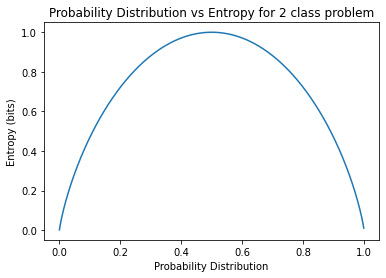

In [10]:
#collapse-hide
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * np.log2(p + ets) for p in events])

# define probabilities
probs = np.arange(0.0001,1,0.001) 
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
plt.plot(probs, ents)
plt.title('Probability Distribution vs Entropy for 2 class problem')
plt.xlabel('Probability Distribution')
plt.ylabel('Entropy (bits)')
plt.show()

Entropy in information theory specifies the __average (expected) amount of information derived from observing an event__ .

## How to generate decision tree


- Select a root not which divides the data best based on impurity measures.
- If node is pure, generate a leaf and stop, otherwise split and continue recursively.
- Impurity after split: 
    -  It is probability weighted entropy given by:
        - $ \displaystyle I_m^{\prime }=-\sum_{j=1}^{n}\frac{N_{mj}}{N_m}\sum_{i=1}^kp_{mj}^i\log_2p_{mj}^i$,<br>
          here, $N_{mj}$ is $j^{th}$ branch of $N_m$ and $N_{mj}^i$ belongs to $i^{th}$ class.
- Information gain: Expected reduction in impurity measure after split. Chose the attribute with maximum information gain.
- Other impurity measure method - Gini impurity/index : $ \displaystyle 1- \sum_{j=1}^cp_j^2$

## Overfitting and generalization

- Noisy training example or if only small number of samples are associated leaf nodes can cause overfitting.
- Using Pruning for better generalization
    - Pruning is the process of removing subtree.
        - Pre-pruning: Early stopping, after a predetermined performance.
        - Post-pruning: Grow the whole then prune the subtree which overfit on the pruning set
    - Pre-pruning is faster, post-pruning is more accurate. 

## Occam's Razor Principle
When multiple hypotheses can solve the problem chose the simplest one


## Select best tree
- Measure performance over training and separate validation data set
- Minimum Description Length : Minimize `size(tree)+size(miscalssifications(tree))`

## Rule Extraction from Trees
- Convert tree to equivalent set of rules.("if else" condition for example).
-  Prune each rules independently of others, by removing any pre-conditions that result in improving its estimates accuracy.
- Sort final rules into desired sequence for use.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

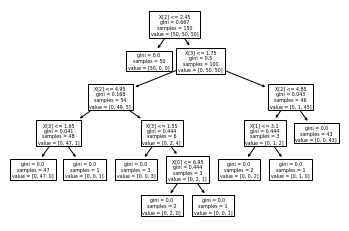

In [2]:
tree.plot_tree(clf)

In [3]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ModuleNotFoundError: No module named 'graphviz'

# Naive Bayes

![](../images/CS5590_images/Acrobat_BRXKLqY6Wd.png)

- In Naive Bayes classifier goal is to learn function $f:X\rightarrow y$, where $y$ is one of $k$ classes and  $X=X_1,...,X_n$: values of attributes (numeric or categorical)
- It is a probabilistic classification 
    - most probable class given observation: $\displaystyle \hat{y}=\arg \max_y P(y|x)$
    - Bayesian probability of a class:<br><br>
    $\displaystyle P\left( Y|X \right)=\frac{P\left( X|Y \right)P\left( Y \right)}{\sum_{y'}P\left( X|Y' \right)P\left( Y' \right)}$<br>

## Formulation

- consider a record with attributes $A_1,A_2,\dots ,A_n$ 
- Goal is to predict class $C$
- Specifically, we want to find the value of $C$ that maximizes $P(C|A_1,A_2,\dots,A_n)$

![](../images/CS5590_images/Acrobat_1cXslTMZjX.png)

- what is Naive about Naive Bayes?
    - The attributes are considered independent of each other, this is Naive in Naive Bayes.

- AS we assume independence among attributes $A_i$ so we can write:<br>
  $P(A_1,A_2,\dots ,A_n|C_j)=P(A_i|C_j)P(A_2|C_j)\dots P(A_n|C_j)$
- New point is classified to $C_j$ if <br>
  $P(C_j)\prod_{j}P(A_i|C_j)=P(C_j)P(A_i|C_j)(A_2|C_j)\dots P(A_n|C_j) $ is __maximal__ .
- Assume that all hypotheses (classes) are equally probable a priori, i.e., $P(C_i)=P(C_j)$ for all $i,j$
- This is called assuming a uniform prior. It simplifies computing the posterior:<br>
  $\displaystyle C_{ML}=\arg \max_c P(A_1,A_2,\dots A_n|C)$
- This hypothesis is called the __maximum likelihood hypothesis__ .

## Example 


In [8]:
import pandas as pd
Attributes =['Day',    'Outlook',  'Temperature',      'Humidity',     'Wind',     'Play Tennis']
data      =[['D1',     'Sunny',    'Hot',              'High',         'Weak',       'No'         ],
            ['D2',     'Sunny',    'Hot',              'High',         'Strong',     'No'         ],
            ['D3',     'Overcast',  'Hot',              'High',        'Weak',       'Yes'        ],
            ['D4',     'Rain',    'Mild',              'High',         'Weak',       'Yes'        ],
            ['D5',     'Rain',    'Cool',              'Normal',       'Weak',       'Yes'        ],
            ['D6',     'Rain',    'Cool',              'Normal',       'Strong',     'No'         ],
            ['D7',     'Overcast', 'Cool',             'Normal',       'Strong',     'Yes'        ],
            ['D8',     'Sunny',    'Mild',              'High',        'Weak',       'No'         ],
            ['D9',     'Sunny',    'Cool',             'Normal',       'Weak',       'Yes'        ],
            ['D10',    'Rain',    'Mild',              'Normal',       'Weak',       'Yes'        ],
            ['D11',    'Sunny',    'Mild',             'Normal',       'Strong',     'Yes'        ],
            ['D12',    'Overcast', 'Mild',              'High',        'Strong',     'Yes'        ],
            ['D13',    'Overcast',  'Hot',             'Normal',       'Weak',       'Yes'        ],
            ['D14',    'Rain',    'Mild',              'High',         'Strong',     'No'         ]]
df = pd.DataFrame(columns=Attributes,data=data)
print(df.head())

  Day   Outlook Temperature Humidity    Wind Play Tennis
0  D1     Sunny         Hot     High    Weak          No
1  D2     Sunny         Hot     High  Strong          No
2  D3  Overcast         Hot     High    Weak         Yes
3  D4      Rain        Mild     High    Weak         Yes
4  D5      Rain        Cool   Normal    Weak         Yes
